In [ ]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from xgboost import XGBClassifier

In [ ]:
df_cleaned_transformed=pd.read_csv('model_data.csv')

##Machine Learning

In [ ]:
# Checks
display(df_cleaned_transformed)
display(df_cleaned_transformed.columns)

,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,angular,angular.js,ansible,apl,asp.net,...,Country_Taiwan,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uruguay,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam
0,0.179487,0.133333,0.250410,0.028302,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.307692,0.166667,0.225783,0.103774,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.384615,0.200000,0.375434,0.056604,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.230769,0.200000,0.224097,0.113208,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.307692,1.000000,0.781727,0.009434,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69693,0.179487,0.066667,0.199436,0.113208,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69694,0.538462,0.533333,0.558611,0.094340,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
69695,0.102564,0.100000,0.280372,0.103774,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69696,0.128205,0.033333,0.340022,0.132075,1.0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Index(['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills',
       'Employed', 'angular', 'angular.js', 'ansible', 'apl', 'asp.net',
       ...
       'Country_Taiwan', 'Country_Thailand', 'Country_Turkey',
       'Country_Ukraine', 'Country_United Arab Emirates',
       'Country_United Kingdom of Great Britain and Northern Ireland',
       'Country_United States of America', 'Country_Uruguay',
       'Country_Venezuela, Bolivarian Republic of...', 'Country_Viet Nam'],
      dtype='object', length=209)

accurcay:  0.723170731707317 precision:  0.802345343303875 Recall:  0.6365107186193879


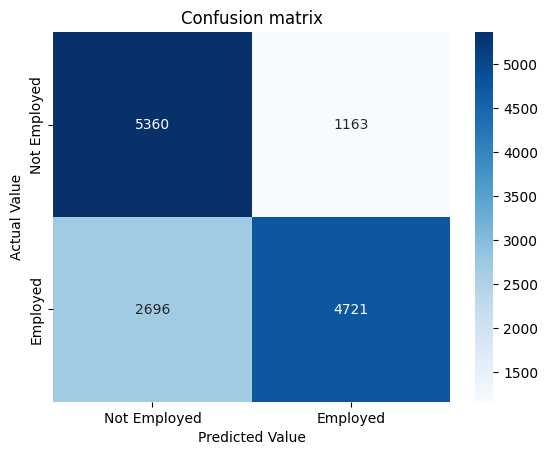

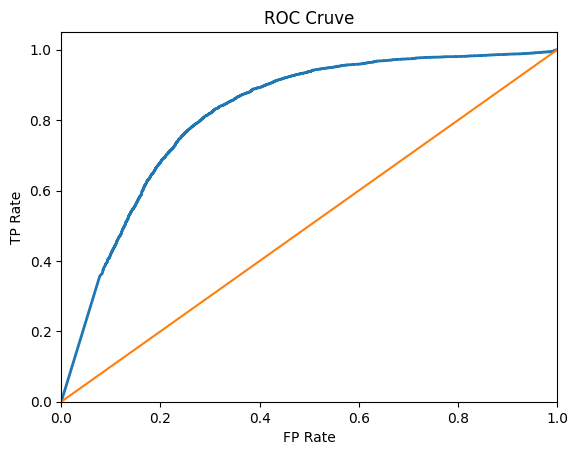

ROC curve area modl1_roc_auc:  0.8192122827490599


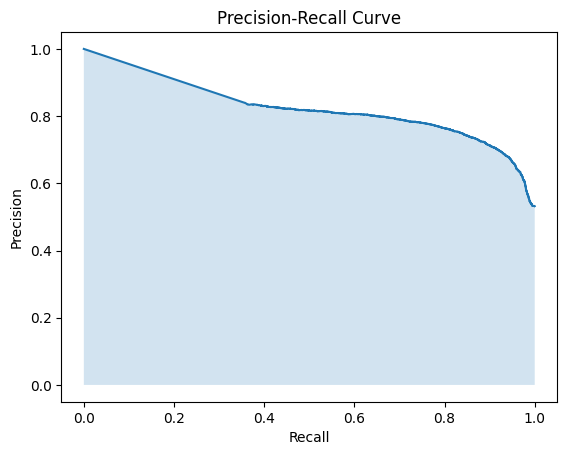

Curve area:  0.8242209185710521


In [ ]:
#Naive bayes  [1]

X = df_cleaned_transformed.drop('Employed', axis=1)
y = df_cleaned_transformed['Employed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
modl1 = GaussianNB()

modl1.fit(X_train, y_train)

modl1_y_pred = modl1.predict(X_test)
modl1_y_pred_prob = modl1.predict_proba(X_test)[:, 1]
modl1_acc = accuracy_score(y_test, modl1_y_pred)
modl1_conf = confusion_matrix(y_test, modl1_y_pred)

tn, fp, fn, tp = modl1_conf[0][0], modl1_conf[0][1], modl1_conf[1][0], modl1_conf[1][1]
precision = tp / (tp + fp)
recall = tp / (tp + fn)

fp, tp, _ = roc_curve(y_test, modl1_y_pred_prob)
modl1_roc_auc = auc(fp, tp)

modl1_precision, modl1_recall, modl1_ac = precision_recall_curve(y_test, modl1_y_pred_prob)
modl1_pr_auc = auc(modl1_recall, modl1_precision)

print("accurcay: ",modl1_acc,"precision: ", precision,"Recall: " ,recall)


#plots

# Confusion matrix

classes = ['Not Employed', 'Employed']
sns.heatmap(modl1_conf, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.title('Confusion matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# ROC Curve

plt.plot(fp, tp, lw=2)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Cruve')
plt.show()
print("ROC curve area modl1_roc_auc: ", modl1_roc_auc)

# Precision-Recall Curve

plt.plot(modl1_recall, modl1_precision)
plt.fill_between(modl1_recall, modl1_precision, alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print("Curve area: ",modl1_pr_auc)

Accuracy:  0.9974892395982783 Precision:  0.9974393530997304 Recall:  0.9978427935823109


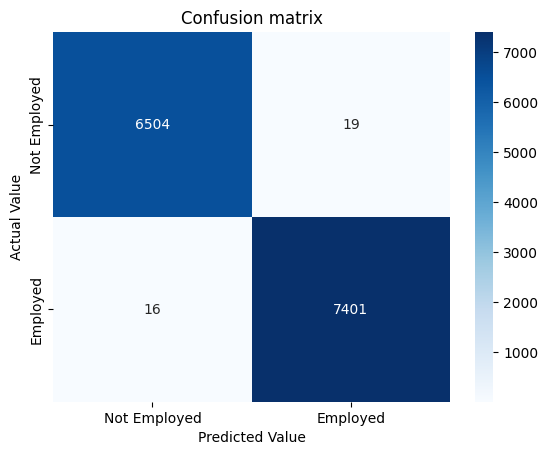

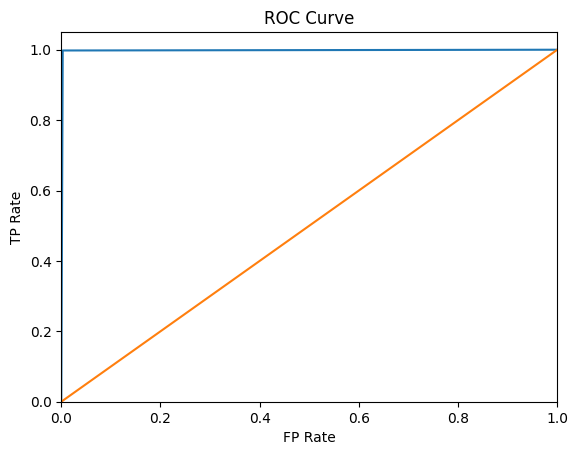

ROC curve area:  0.9974650116922745


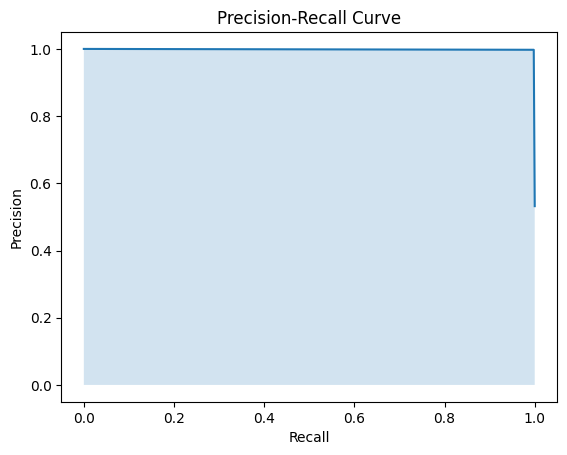

Precision-Recall curve area:  0.9982149614328427


In [ ]:
# Decision Tree  [2]

modl2 = DecisionTreeClassifier(random_state=42)
modl2.fit(X_train, y_train)

modl2_y_pred = modl2.predict(X_test)
modl2_y_pred_prob = modl2.predict_proba(X_test)[:, 1]
modl2_acc = accuracy_score(y_test, modl2_y_pred)
modl2_conf = confusion_matrix(y_test, modl2_y_pred)

tn, fp, fn, tp = modl2_conf.ravel()
modl2_precision = tp / (tp + fp)
modl2_recall = tp / (tp + fn)

fpr_modl2, tpr_modl2, _ = roc_curve(y_test, modl2_y_pred_prob)
modl2_roc_auc = auc(fpr_modl2, tpr_modl2)

modl2_precision_curve, modl2_recall_curve, _ = precision_recall_curve(y_test, modl2_y_pred_prob)
modl2_pr_auc = auc(modl2_recall_curve, modl2_precision_curve)

print("Accuracy: ", modl2_acc, "Precision: ", modl2_precision, "Recall: ", modl2_recall)

# Plots

# Confusion matrix

classes = ['Not Employed', 'Employed']
sns.heatmap(modl2_conf, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.title('Confusion matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# ROC Curve

plt.plot(fpr_modl2, tpr_modl2)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.show()
print("ROC curve area: ", modl2_roc_auc)

# Precision-Recall Curve

plt.plot(modl2_recall_curve, modl2_precision_curve)
plt.fill_between(modl2_recall_curve, modl2_precision_curve, alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print("Precision-Recall curve area: ", modl2_pr_auc)


Accuracy:  0.9666427546628408 Precision:  0.9608857067090957 Recall:  0.9770796818120534


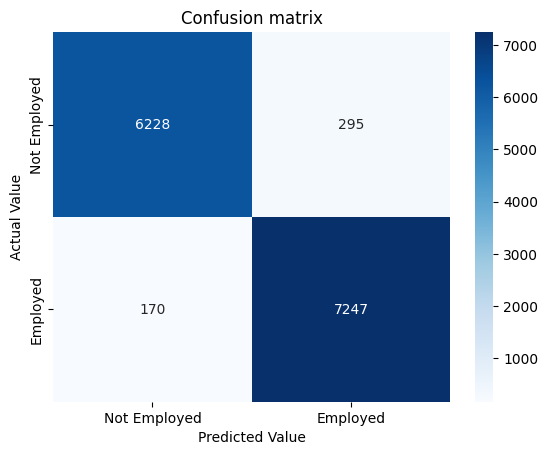

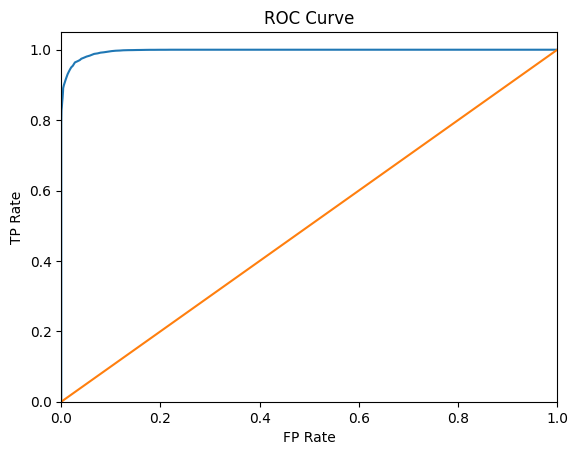

ROC curve area:  0.9966039211476236


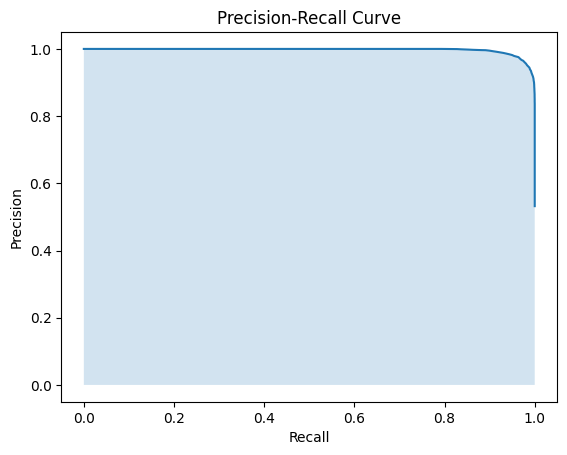

Precision-Recall curve area:  0.9970527446572546


In [ ]:
# Random Forest  [3]

modl3 = RandomForestClassifier(random_state=7)

modl3.fit(X_train, y_train)

modl3_y_pred = modl3.predict(X_test)
modl3_y_pred_prob = modl3.predict_proba(X_test)[:, 1]
modl3_acc = accuracy_score(y_test, modl3_y_pred)
modl3_conf = confusion_matrix(y_test, modl3_y_pred)

tn, fp, fn, tp = modl3_conf.ravel()
modl3_precision = tp / (tp + fp)
modl3_recall = tp / (tp + fn)

fpr_modl3, tpr_modl3, _ = roc_curve(y_test, modl3_y_pred_prob)
modl3_roc_auc = auc(fpr_modl3, tpr_modl3)

modl3_precision_curve, modl3_recall_curve, _ = precision_recall_curve(y_test, modl3_y_pred_prob)
modl3_pr_auc = auc(modl3_recall_curve, modl3_precision_curve)

print("Accuracy: ", modl3_acc, "Precision: ", modl3_precision, "Recall: ", modl3_recall)

# Plots

# Confusion matrix

classes = ['Not Employed', 'Employed']
sns.heatmap(modl3_conf, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.title('Confusion matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# ROC Curve for Random Forest

plt.plot(fpr_modl3, tpr_modl3)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.show()
print("ROC curve area: ", modl3_roc_auc)

# Precision-Recall Curve for Random Forest

plt.plot(modl3_recall_curve, modl3_precision_curve)
plt.fill_between(modl3_recall_curve, modl3_precision_curve, alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print("Precision-Recall curve area: ", modl3_pr_auc)


Accuracy:  0.8393113342898135 Precision:  0.9567672489853538 Recall:  0.7310233247943912


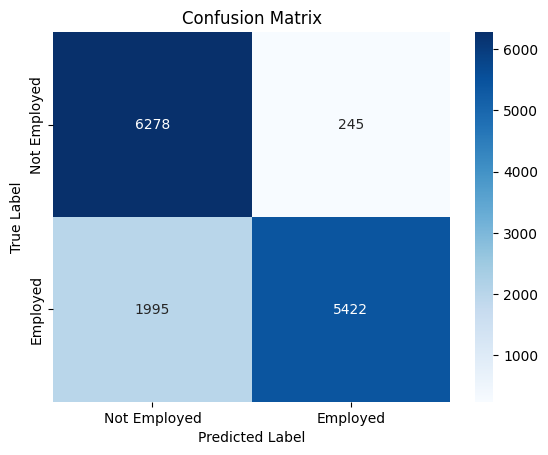

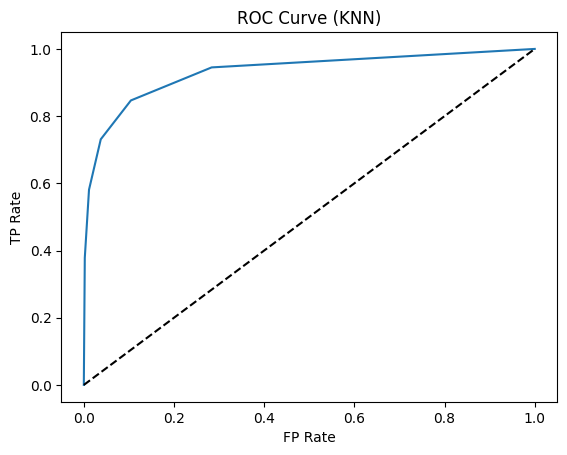

ROC curve area:  0.9319582830407855


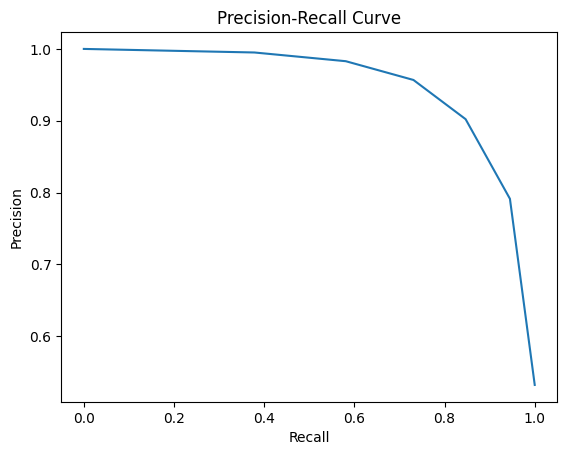

Precision-Recall curve area:  0.9504606269805723


In [ ]:
# K-Nearest Neighbors (KNN)
modl4 = KNeighborsClassifier(n_neighbors=5)

modl4.fit(X_train, y_train)

modl4_y_pred = modl4.predict(X_test)
modl4_y_pred_prob = modl4.predict_proba(X_test)[:, 1]
modl4_acc = accuracy_score(y_test, modl4_y_pred)
modl4_conf = confusion_matrix(y_test, modl4_y_pred)

tn, fp, fn, tp = modl4_conf.ravel()
modl4_precision = tp / (tp + fp)
modl4_recall = tp / (tp + fn)

fpr_modl4, tpr_modl4, _ = roc_curve(y_test, modl4_y_pred_prob)
modl4_roc_auc = auc(fpr_modl4, tpr_modl4)

modl4_precision_curve, modl4_recall_curve, _ = precision_recall_curve(y_test, modl4_y_pred_prob)
modl4_pr_auc = auc(modl4_recall_curve, modl4_precision_curve)

print("Accuracy: ", modl4_acc, "Precision: ", modl4_precision, "Recall: ", modl4_recall)

# Plots

classes = ['Not Employed', 'Employed']
sns.heatmap(modl4_conf, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve

plt.plot(fpr_modl4, tpr_modl4, label=f'ROC Curve (area = {modl4_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve (KNN)')
plt.show()
print("ROC curve area: ", modl4_roc_auc)

# Precision-Recall Curve

plt.plot(modl4_recall_curve, modl4_precision_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print("Precision-Recall curve area: ", modl4_pr_auc)


Accuracy:  1.0 Precision:  1.0 Recall:  1.0


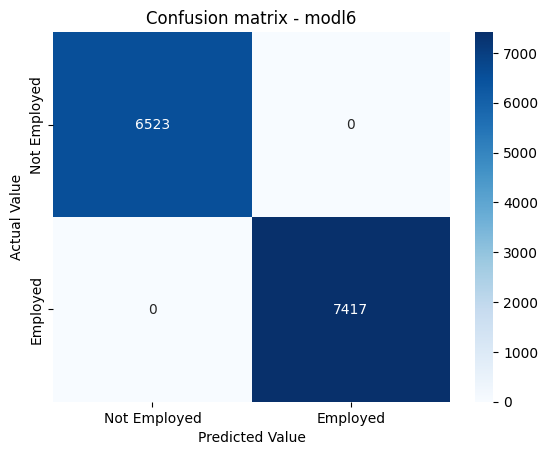

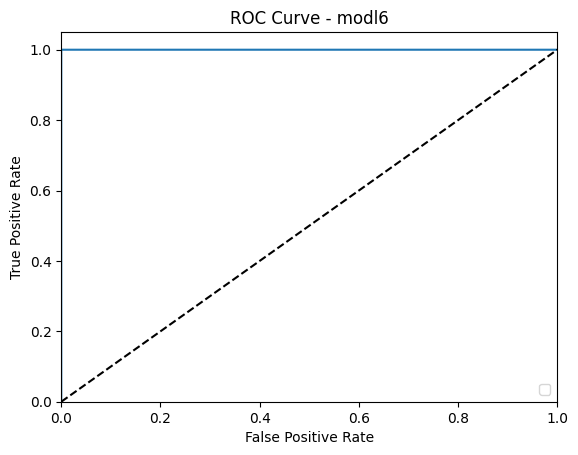

ROC curve area:  0.9999999999999999


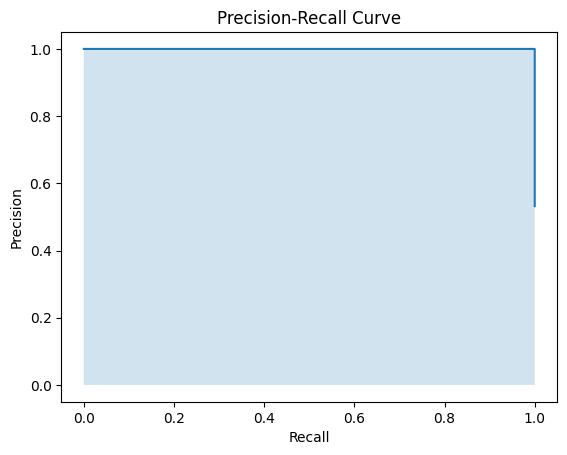

Precision-Recall curve area:  1.0


In [ ]:
#XGboost           [4]
X_train.columns = [cname.replace('[', '').replace(']', '').replace('<', '') for cname in X_train.columns]
X_test.columns = [cname.replace('[', '').replace(']', '').replace('<', '') for cname in X_test.columns]

modl6 = XGBClassifier(random_state=7)
modl6.fit(X_train, y_train)
modl6_y_pred = modl6.predict(X_test)
modl6_y_pred_prob = modl6.predict_proba(X_test)[:, 1]
modl6_acc = accuracy_score(y_test, modl6_y_pred)
modl6_conf = confusion_matrix(y_test, modl6_y_pred)

tn, fp, fn, tp = modl6_conf.ravel()
modl6_precision = tp / (tp + fp)
modl6_recall = tp / (tp + fn)

fpr_modl6, tpr_modl6, _ = roc_curve(y_test, modl6_y_pred_prob)
modl6_roc_auc = auc(fpr_modl6, tpr_modl6)

modl6_precision_curve, modl6_recall_curve, _ = precision_recall_curve(y_test, modl6_y_pred_prob)
modl6_pr_auc = auc(modl6_recall_curve, modl6_precision_curve)
print("Accuracy: ", modl6_acc, "Precision: ", modl6_precision, "Recall: ", modl6_recall)

# Plots
# Confusion matrix
classes = ['Not Employed', 'Employed']
sns.heatmap(modl6_conf, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.title('Confusion matrix - modl6')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# ROC Curve
plt.plot(fpr_modl6, tpr_modl6)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - modl6')
plt.legend(loc="lower right")
plt.show()
print("ROC curve area: ", modl6_roc_auc)

# Precision-Recall Curve
plt.plot(modl6_recall_curve, modl6_precision_curve)
plt.fill_between(modl6_recall_curve, modl6_precision_curve, alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print("Precision-Recall curve area: ", modl6_pr_auc)


MSE:  893181021.1796179
MAE:  21199.35981039931
R-squared (R2): 0.5822607387765737


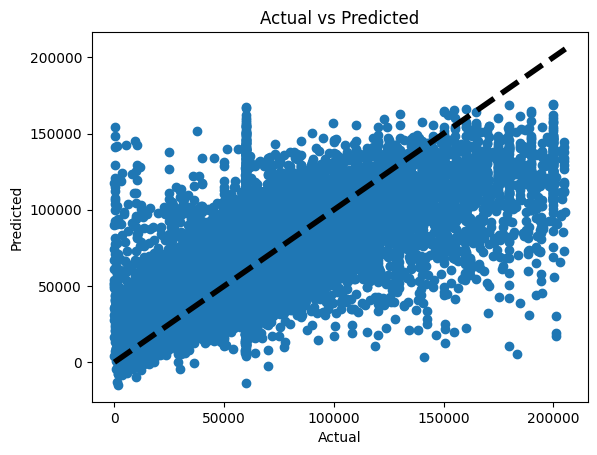

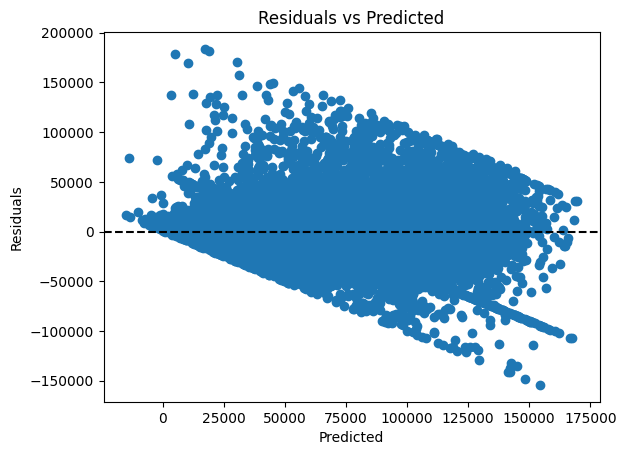

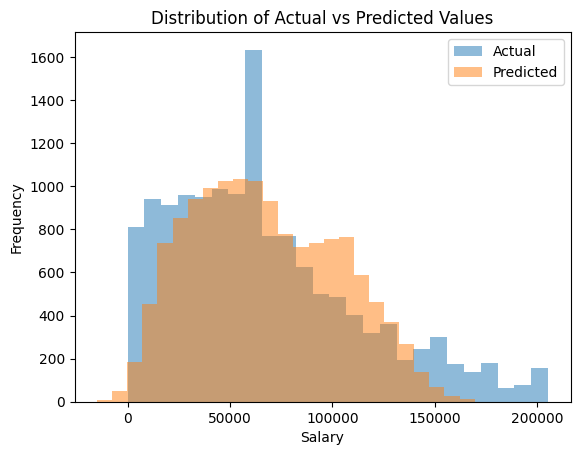

In [ ]:
#linear Regression
df_cleaned_transformed=pd.read_csv('salary_data.csv')
df_cleaned_transformed = df_cleaned_transformed.drop('Unnamed: 0', axis=1)
X = df_cleaned_transformed.drop('PreviousSalary', axis=1)
y = df_cleaned_transformed['PreviousSalary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print(f'R-squared (R2): {r2}')

#plot1
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

#plot2

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.show()

#plot 3

plt.hist(y_test, bins=25, alpha=0.5, label='Actual')
plt.hist(y_pred, bins=25, alpha=0.5, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Actual vs Predicted Values')
plt.show()



References

1. https://scikit-learn.org/stable/modules/naive_bayes.html

 2. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

4. https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn